# Libraries Used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
cats_path=r'F:\Data_science(Uni)\dataset\dogscats\train\cats'
dogs_path=r'F:\Data_science(Uni)\dataset\dogscats\train\dogs'

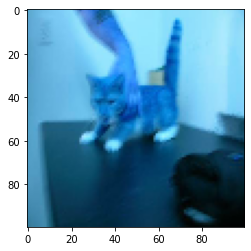

In [3]:
for img_name in os.listdir(cats_path):                                #This section is only for demonstration for the usage of cv functions.
  img_path=os.path.join(cats_path,img_name)
  img_arr=cv2.imread(img_path)
  img_arr=cv2.resize(img_arr,(100,100))                                #reduce quality to reduce time for training the data and feature scaling.
  plt.imshow(img_arr)
  break


In [4]:
data=[]

for img_name in os.listdir(cats_path):                               #0 for cats
  img_path=os.path.join(cats_path,img_name)                          #1 for dogs
  img_arr=cv2.imread(img_path)
  img_arr=cv2.resize(img_arr,(100,100))                                #reduce quality to make the trainning of data faster.
  data.append([img_arr,0])

for img_name in os.listdir(dogs_path):                               #0 for cats
  img_path=os.path.join(dogs_path,img_name)                          #1 for dogs
  img_arr=cv2.imread(img_path)
  img_arr=cv2.resize(img_arr,(100,100))                                #reduce quality to make the trainning of data faster.
  data.append([img_arr,1])
  

In [5]:
print(len(data))                                  #Sanity check for the data.     

23000


In [6]:
random.shuffle(data)                            #shuffle dogs and cats data

X=[]
Y=[]
for feature,label in data:
    X.append(feature)
    Y.append(label)

X=np.array(X)
Y=np.array(Y)

In [7]:
X=X/255                             #Feature scaling

In [8]:
X.shape

(23000, 100, 100, 3)

(Number of arrays,Picture length previously specified,Picture width already specified,number of pic. layers)

In [9]:
model = Sequential()

model.add(Dense(128, input_shape=X.shape[1:],activation='relu'))

model.add(Conv2D(64, (3,3), activation='relu'))       (filters,kernal_size,activation function) 
model.add(MaxPooling2D((2,2)))          
          

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))         

model.add(Flatten())
model.add(Dense(2, activation="softmax"))

model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X,Y,epochs=5,validation_split=0.1)

Epoch 1/5
647/647 [==============================] - 6372s 10s/step - loss: 0.6110 - accuracy: 0.6592 - val_loss: 0.5239 - val_accuracy: 0.7322
Epoch 2/5
647/647 [==============================] - 6024s 9s/step - loss: 0.5065 - accuracy: 0.7541 - val_loss: 0.4901 - val_accuracy: 0.7626
Epoch 3/5
647/647 [==============================] - 5848s 9s/step - loss: 0.4425 - accuracy: 0.7965 - val_loss: 0.4541 - val_accuracy: 0.7800
Epoch 4/5
647/647 [==============================] - 6198s 10s/step - loss: 0.3865 - accuracy: 0.8281 - val_loss: 0.4548 - val_accuracy: 0.7865
Epoch 5/5
647/647 [==============================] - 6239s 10s/step - loss: 0.3258 - accuracy: 0.8567 - val_loss: 0.4619 - val_accuracy: 0.7974


In [26]:
img_arr=cv2.imread("F:\Data_science(Uni)\dataset\dogscats\myTest\VSy6kJDNq2pSXsCzb6cvYF.jpg")
img_arr_cat = cv2.resize(img_arr,(100, 100))
img_arr_cat=np.array(img_arr_cat)
img_arr_cat=img_arr_cat.reshape(-1,100,100,3)
prediction=model.predict(img_arr_cat)
if(prediction.argmax() == 0):
    print('This is a cat')
else:
    print('failed attempt,it detected a dog')

img_arr=cv2.imread('F:\Data_science(Uni)\dataset\dogscats\myTest\smartest-dog-breeds-1553287693.jpg')
img_arr_dog = cv2.resize(img_arr,(100, 100))
img_arr_dog=np.array(img_arr_dog)
img_arr_dog=img_arr_dog.reshape(-1,100,100,3)
prediction=model.predict(img_arr_dog)
if(prediction.argmax() == 1):
    print('This is a dog')
else:
    print('failed attempt,it detected a cat')


This is a cat
This is a dog
